In [136]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd 
from PIL import Image
from matplotlib.pyplot import imshow

# [Artificial Neural Networks](https://en.wikipedia.org/wiki/Artificial_neural_network)

### What is it?
It is a non-parametric classification / regression model which mimics biological neural networks architecture.

### When do I use it?
I want to predict / classify a response variable based on arbitrary data. Be it countinous (regression problem) or categorical (classification problem) response. NN model is especialy suitable when I want to classify N-dimensional objects like images. When I do Natural Language Processing.

### Why should I use it?
It can discover and incorporate implicit attributes like edgeness, curvature in images / sentiment, familyness in text.

### Why should I NOT use it?
Training lots of parameters and hyperparameters including number of layers and number of Neurons in each layer can be computationaly expensive.

# How does it work?

* Neural Network is a set of real valued nodes (Neurons), conected to each other forming layers.


* First layer is input vector $X$, last one is output $y$. Other layers of Neurons are called hidden layers.


* Value of j-th Neuron $a_j^{(L)}$ in L-th layer is computed by $a_j^{(L)} = \sigma (\sum_i a_i^{(L-1)}*w_{ij}^{(L-1)} + b_j$)


* $\sigma$ is called an activation function. Often it is a sigmoid like $\sigma_1(t) = \frac{1}{1+\exp(-t)}$ or a ReLU function $\sigma_2(t) = min(0, t)$.


* Classcal design of NN where each Neuron in L-th layer is connected to all Neurons in (L+1)-th layer is called Multi Layer Perceptron.

## Single Neuron img
<img src="neuron_example.png" alt="Drawing" style="width: 300px;"/>

## Multi Layer Perceptron img
<img src="nn_example.png" alt="Drawing" style="width: 600px;"/>

## How is it trained?

In order to train the model, you need to fit quite a lot of parameters - all the weights and biases. **For fitting them we use gradient descent method called back propagation**.

### Back propagation 

* First we define our Loss function $L$. It could be for example mean squared error $L = \sum (a_j - y_j)^2$ or a Cross-Entropy.


* The negative gradient of L is then computed by chain rule. 


* We define $z^{(L)} = w^{(L)}a^{(L-1)}+b^{(L)}$ and $a^{(L)} = \sigma (z^{(L)})$.


* For computing the influence of weight $w_{jk}^{(L)}$, connecting neuron $a_j^{(L-1)}$ to a output neuron $a_k^{(L)}$ we get $\frac{\partial L}{\partial w_{jk}^{(L)}} = \frac{\partial L}{\partial a_{j}^{(L)}} \frac{\partial a_{j}^{(L)}}{\partial z_{j}^{(L)}} \frac{\partial z_{j}^{(L)}}{\partial w_{jk}^{(L)}}$.


* This partial derivative we compute for all the $w$ and $b$ and thus we optain a gradient $\nabla$ for single given training row.


* We do this for a small batch of N training datapoints -> make the avarage $\bar{\nabla} = \frac{1}{N}\sum\nabla_i$ -> set the new weights as $W_{new} = W_{old} + \eta \bar{\nabla}$, where $\eta$ is a learning speed.

## Dataset - MNIST handwritten digits


<img src="mnist_network.png" alt="Drawing" style="width: 600px;"/>

### Load MNIST the dataset from web

In [137]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

train_X, val_X, train_y, val_y = train_test_split(X, y)

### Fit the MLP classifier to the data

In [151]:
# FIT THE MultiLayerPerceptron
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=10, tol=5e-2, random_state=1,
                    learning_rate_init=.1)

# train the model
mlp.fit(train_X, train_y)
print(f"Training set score: {mlp.score(train_X, train_y)}")
print(f"Test set score: {mlp.score(val_X, val_y)}")

Iteration 1, loss = 0.33761426
Iteration 2, loss = 0.15967946
Iteration 3, loss = 0.11584609
Iteration 4, loss = 0.09466358
Iteration 5, loss = 0.07962885
Iteration 6, loss = 0.06791872
Iteration 7, loss = 0.05955260
Iteration 8, loss = 0.05253346
Iteration 9, loss = 0.04665493
Iteration 10, loss = 0.04187059
Iteration 11, loss = 0.03726223
Iteration 12, loss = 0.03377286
Iteration 13, loss = 0.02985019
Training loss did not improve more than tol=0.050000 for 10 consecutive epochs. Stopping.
Training set score: 0.9935428571428572
Test set score: 0.9689714285714286


### Define function for own images

In [148]:
def my_img_to_predictors(img_path):
    img = Image.open(img_path)
    # resize the original img to 28x28 pixel img
    img = img.resize((28, 28))
    img_arr = np.array(img)
    # create a single-channel array
    img_arr = np.mean(img_arr, 2)
    %matplotlib inline
    imshow(1 - img_arr/255)
    #flatten the 2-D array to a vector
    img_arr = img_arr.flatten()
    # normalize the array to [0, 1] interval and invert
    img_arr = (1 - img_arr / 255)

    return img_arr

array(['1'], dtype='<U1')

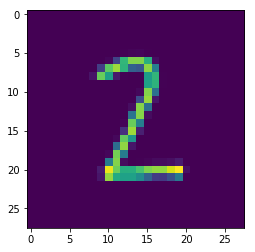

In [150]:
# let the model fit own images
img_path = "./data/num_2.png"
X_own = my_img_to_predictors(img_path)
mlp.predict([X_own])

## Sources
[Scikit documentation](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)

[Wiki](https://en.wikipedia.org/wiki/Artificial_neural_network)

[Cool video on backpropagation](https://www.youtube.com/watch?v=tIeHLnjs5U8&t=303s)

[Article - adventuresinmachinelearning.com](https://adventuresinmachinelearning.com/neural-networks-tutorial/)